In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression

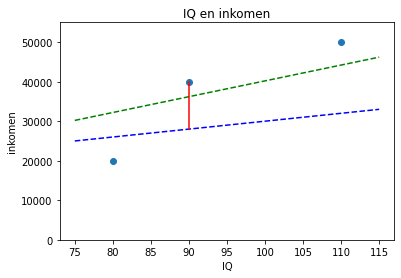

In [ ]:
df = pd.DataFrame({'IQ':[80, 90, 110], 'inkomen':[20000, 40000, 50000]})
plt.scatter(df.IQ, df.inkomen)
plt.ylim([0,55000])
plt.ylabel('inkomen')
plt.xlabel('IQ')
plt.title('IQ en inkomen')
x = np.linspace(75, 115, 100)
y1 = 200 + 400*x
y2 = 10000 + 200*x
plt.plot(x, y1,'--g')
plt.plot(x, y2,'--b')
plt.plot([90,90],[40000,28000], color = 'red')

Formule groene lijn: $inkomen = 200 + 400 \cdot IQ$\
Formule blauwe lijn: $inkomen = 10000 + 200 \cdot IQ$

Loss groene lijn: $12200^2 + 3800^2 + 5800^2 = 196.920.000$\
Loss blauwe lijn: $6000^2 + 12000^2 + 18000^2 = 504.000.000$\
 

Lossfunctie voor een algemene lijn:\
$L(a, b) = (20000 - (a + b \cdot 80))^2 + (40000 - (a + b \cdot 90))^2 + (50000 - (a + b  \cdot 110))^2$

In [ ]:
X = df.IQ.values.reshape(-1, 1)
y = df.inkomen.values
lr = LinearRegression()
lr.fit(X,y)
print('a = {:.0f}, b = {:.0f}'.format(lr.intercept_, lr.coef_[0]))

a = -50000, b = 929


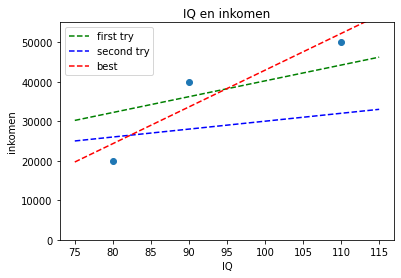

In [ ]:
plt.scatter(df.IQ, df.inkomen)
plt.ylim([0,55000])
plt.ylabel('inkomen')
plt.xlabel('IQ')
plt.title('IQ en inkomen')
x = np.linspace(75, 115, 100)
y1 = 200 + 400*x
y2 = 10000 + 200*x
ybest = -50000 + 929*x
plt.plot(x, y1,'--g', label = 'first try')
plt.plot(x, y2,'--b', label = 'second try')
plt.plot(x, ybest, '--r', label = 'best')
plt.legend()

En de voorspelling van het inkomen voor iemand met een IQ van 100 is dus:\
$inkomen = -50000 + 929 \cdot 100 = 42.900$


## Evaluatie

#### R squared
Dit komt neer op het vergelijken van de variantie vóór en na het model

In [ ]:
print('Zonder ons model is de variantie van inkomen: {:.0f}'.format(np.var(df.inkomen)))
df['ypred'] = -50000 + 929 * df.IQ
display(df)
print('Als we rekening houden met ons model dan is de variantie van inkomen nog maar: {:.0f}'.format(np.var(df.inkomen - df.ypred)))
print('De R**2 is dus: {:.3f}'.format((155555556 - 21428600)/155555556))

from sklearn.metrics import r2_score
print('Check: {}'.format(r2_score(df.inkomen, df.ypred)))

Zonder ons model is de variantie van inkomen: 155555556


,IQ,inkomen,ypred
0,80,20000,24320
1,90,40000,33610
2,110,50000,52190


Als we rekening houden met ons model dan is de variantie van inkomen nog maar: 21428600
De R**2 is dus: 0.862
Check: 0.8622344285714285


#### RMSE
Dit komt neer op de gemiddelde fout:

In [ ]:
RMSE = np.sqrt(np.mean((df.ypred - df.inkomen)**2))
print('De RMSE is: {:.0f}'.format(RMSE))
from sklearn.metrics import mean_squared_error
print('Check: {}'.format(np.sqrt(mean_squared_error(df.inkomen, df.ypred))))

De RMSE is: 4629
Check: 4629.276401339631


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=1e9b27b8-a34d-4e11-8ef1-1fdc6f91d699' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>